<a href="https://colab.research.google.com/github/BeautyKabore/Projects/blob/main/Data_Analysis/Heart_Disease_Stats_for__Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 03 - Data Prep and Exploratory Data Analysis (EDA)

Beauty Kabore

## Term Project

Heart Disease

Associated Task - Classification

*Project Part I


## Data Prep

# Dataset is from the UC Irvine Machine Learning Repocitory

* https://archive.ics.uci.edu/dataset/45/heart+disease

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

### Errors

In [ ]:
# download heart disease dataset  from UCI
#install ucimlrepo
# print shape, info, and first five rows
!pip install ucimlrepo



In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch heart disease dataset and assigning a variable to it
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)



{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:
# create dataframe from uci url
import pandas as pd
heart_disease_df=pd.read_csv(heart_disease.metadata.data_url)
print(heart_disease_df.shape)
print(heart_disease_df.info())
heart_disease_df.head()


(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Complete-Case Analysis (CCA)

* Aka Listwise deletion
* Reduces sample size
* Can reduce the statistical efficiency of estimates

In [ ]:
# delete rows with missing values example of cca
print(heart_disease_df.shape)
print(heart_disease_df.dropna().shape)



(303, 14)
(297, 14)


In [ ]:
# features with only one value (constant)
constant_features = [
    feat for feat in heart_disease_df.columns if len(heart_disease_df[feat].unique()) == 1
]

print(heart_disease_df.shape)
constant_features

(303, 14)


[]

In [ ]:
# drop constant_features
heart_disease_df.drop(constant_features, axis=1, inplace=True)
print(heart_disease_df.shape)

(303, 14)


In [ ]:
# identify quasi constant values (sometimes these may be boolean/binary features)
quasi_consts = []
for val in heart_disease_df.columns.sort_values():
    if (len(heart_disease_df[val].unique()) < 3):
        val_counts = heart_disease_df[val].value_counts(normalize=True)
        print(val_counts)
        if list(val_counts)[0] > .98:
            quasi_consts.append(val)

print('quasi_consts', quasi_consts)

0    0.673267
1    0.326733
Name: exang, dtype: float64
0    0.851485
1    0.148515
Name: fbs, dtype: float64
1    0.679868
0    0.320132
Name: sex, dtype: float64
quasi_consts []


In [ ]:
# drop quasi_consts
heart_disease_df.drop(quasi_consts, axis=1, inplace=True)
heart_disease_df.shape

(303, 14)

### Duplications

In [ ]:
# duplicate rows
heart_disease_df[heart_disease_df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [ ]:
# drop duplicate rows
print(heart_disease_df.shape)
heart_disease_df.drop_duplicates(inplace=True)
heart_disease_df.shape


(303, 14)


(303, 14)

In [ ]:
# check of duplications
duplicated_feats = []
for i in range(0, len(heart_disease_df.columns)):
    orig = heart_disease_df.columns[i]

    for dupe in heart_disease_df.columns[i + 1:]:
        if heart_disease_df[orig].equals(heart_disease_df[dupe]):
            duplicated_feats.append(dupe)

duplicated_feats

[]

In [ ]:
# drop duplicated_feats
print(heart_disease_df.shape)
heart_disease_df.drop(duplicated_feats, axis=1, inplace=True)
heart_disease_df.shape

(303, 14)


(303, 14)

### Any vs All

In [ ]:
# count nulls
heart_disease_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [ ]:
# drop columns with null values https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
print(heart_disease_df.shape)
heart_disease_df.dropna(how='all', axis='columns', inplace=True) # 1
print(heart_disease_df.shape)

(303, 14)
(303, 14)


In [ ]:
# drop rows with null values
print(heart_disease_df.shape)
print(heart_disease_df.dropna(how='any', axis='index').shape) # information is lost when we drop

(303, 14)
(297, 14)


## Exploratory Data Analysis

### Train Test Split

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(heart_disease_df.drop('chol', axis=1), heart_disease_df['chol'], test_size=.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [ ]:
# info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 132 to 102
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   fbs       242 non-null    int64  
 5   restecg   242 non-null    int64  
 6   thalach   242 non-null    int64  
 7   exang     242 non-null    int64  
 8   oldpeak   242 non-null    float64
 9   slope     242 non-null    int64  
 10  ca        239 non-null    float64
 11  thal      240 non-null    float64
 12  num       242 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 26.5 KB


In [ ]:
# brief statistics
X_train.describe()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,239.000000,240.000000,242.000000
mean,54.805785,0.657025,3.090909,132.289256,0.136364,0.991736,150.099174,0.338843,1.035537,1.595041,0.648536,4.687500,0.896694
std,9.110177,0.475687,0.989572,18.208993,0.343886,0.997889,22.470970,0.474297,1.187861,0.618907,0.899292,1.931421,1.209261
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,0.500000,152.500000,0.000000,0.750000,2.000000,0.000000,3.000000,0.000000
75%,61.750000,1.000000,4.000000,140.000000,0.000000,2.000000,166.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# value counts
X_train['num'].value_counts(dropna=False)

0    135
1     43
3     28
2     27
4      9
Name: num, dtype: int64

<Axes: ylabel='num'>

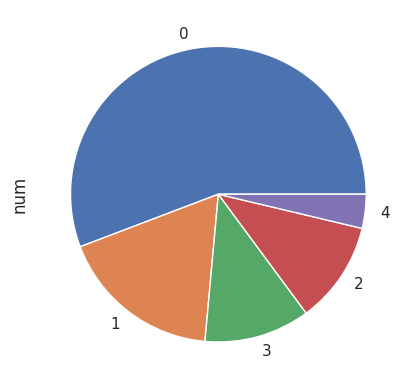

In [ ]:
# pie chart
X_train['num'].value_counts(dropna=False).plot.pie()

<Axes: ylabel='sex'>

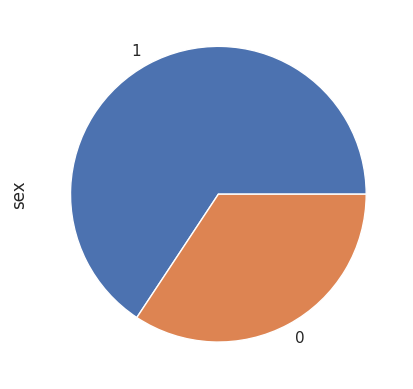

In [ ]:
# pie chart
X_train['sex'].value_counts(dropna=False).plot.pie()

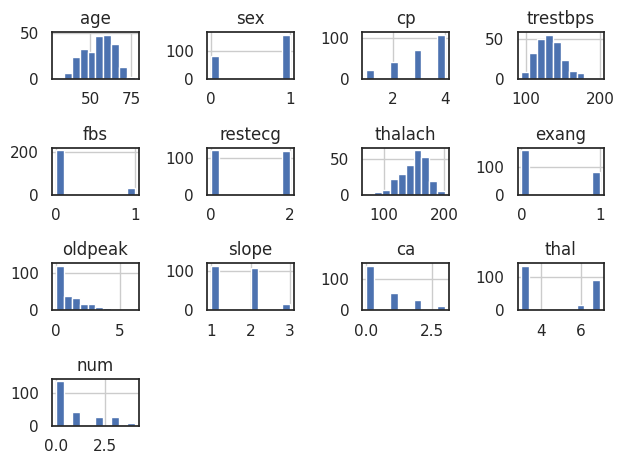

In [ ]:
# show histograms
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout()

In [ ]:
# mean, median, mode
import numpy as np

print('mean:', int(np.mean(X_train['age'])))
print('mean:', int(X_train['age'].mean()))
print('median:', int(X_train['age'].median()))
print('mode:', X_train['num'].mode())
print('mode:', X_train['num'].mode()[0])

mean: 54
mean: 54
median: 56
mode: 0    0
Name: num, dtype: int64
mode: 0


In [ ]:
X_train['num'].value_counts()

0    135
1     43
3     28
2     27
4      9
Name: num, dtype: int64

In [ ]:
# what happens to the mean and median with skewed data
import numpy as np
from scipy.stats import skewnorm, norm
from scipy import stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(14, 3))
skew = 20
n = 100000

r = skewnorm.rvs(skew, loc=0, scale=10, size=n)
ax[0].hist(r, bins=50, density=True, alpha=0.4)
ax[0].axvline(x=np.median(r), color='green', label='Median')
ax[0].axvline(x=np.mean(r).round(2), color='red', label='Mean')
ax[0].legend()
print(f'right skew data mean: {np.mean(r).round(2)}, median: {np.median(r).round(2)}')

l = skewnorm.rvs(-skew, loc=0, scale=10, size=n)
ax[2].hist(l, bins=50, density=True, alpha=0.4);
ax[2].axvline(x=np.mean(l).round(2), color='red', label='Mean')
ax[2].axvline(x=np.median(l), color='green', label='Median')
ax[2].legend()
print(f'left skew data mean: {np.mean(l).round(2)}, median: {np.median(l).round(2)}')

n = norm.rvs(loc=0, scale=1, size=n)
ax[1].hist(n, bins=50, density=True, alpha=0.4);
ax[1].axvline(x=np.mean(n).round(2), color='red', linewidth=3, label='Mean')
ax[1].axvline(x=np.median(n), color='green', label='Median')
ax[1].legend()
print(f'normal data mean: {np.mean(n).round(2)}, median: {np.median(n).round(2)}')

In [ ]:
X_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          3
thal        2
num         0
dtype: int64

In [ ]:
# replace missing values ('ca' and 'thal') with mean
X_train['ca'].fillna(X_train['ca'].round(decimals=2).mean(), inplace=True)
X_train['thal'].fillna(X_train['thal'].round(decimals=2).mean(), inplace=True)
X_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
# Age variance and standard deviation
print('Population variance:', X_train['num'].var(ddof=0))
print('Sample variance:', X_train['num'].var(ddof=1))
print('Population std dev:', X_train['num'].std(ddof=0))
print('Sample std dev:', X_train['num'].std(ddof=1))
print('Square root of sample variance:', np.sqrt(X_train['num'].var()))
print('Square root of sample variance:', X_train['num'].var()**(1/2))

Population variance: 1.4562700635202515
Sample variance: 1.4623126778917048
Population std dev: 1.2067601516126771
Sample std dev: 1.2092612116047157
Square root of sample variance: 1.2092612116047157
Square root of sample variance: 1.2092612116047157


<Axes: >

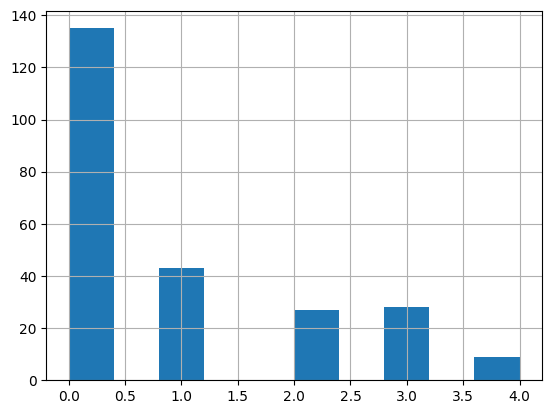

In [ ]:
# Age histogram
X_train['num'].hist()

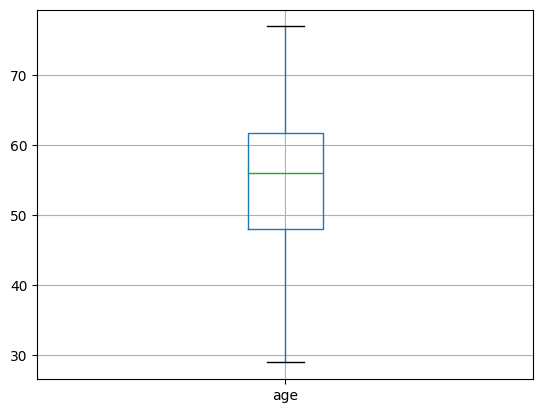

In [ ]:
# Age boxplot
X_train.boxplot(column=['age']);

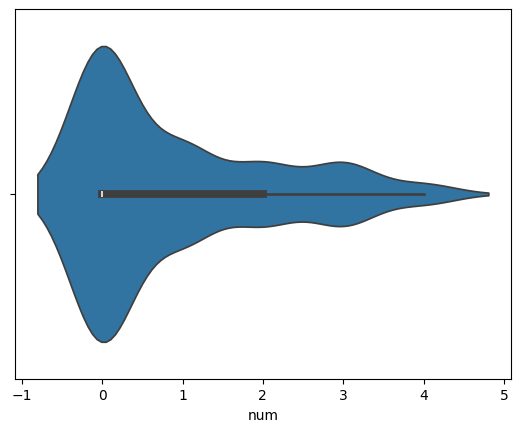

In [ ]:
# Age violinplot
import seaborn as sns

sns.violinplot(x=X_train['num']);

mean before outliers: -0.10384651739409385
var before outliers: 0.8165221946938582


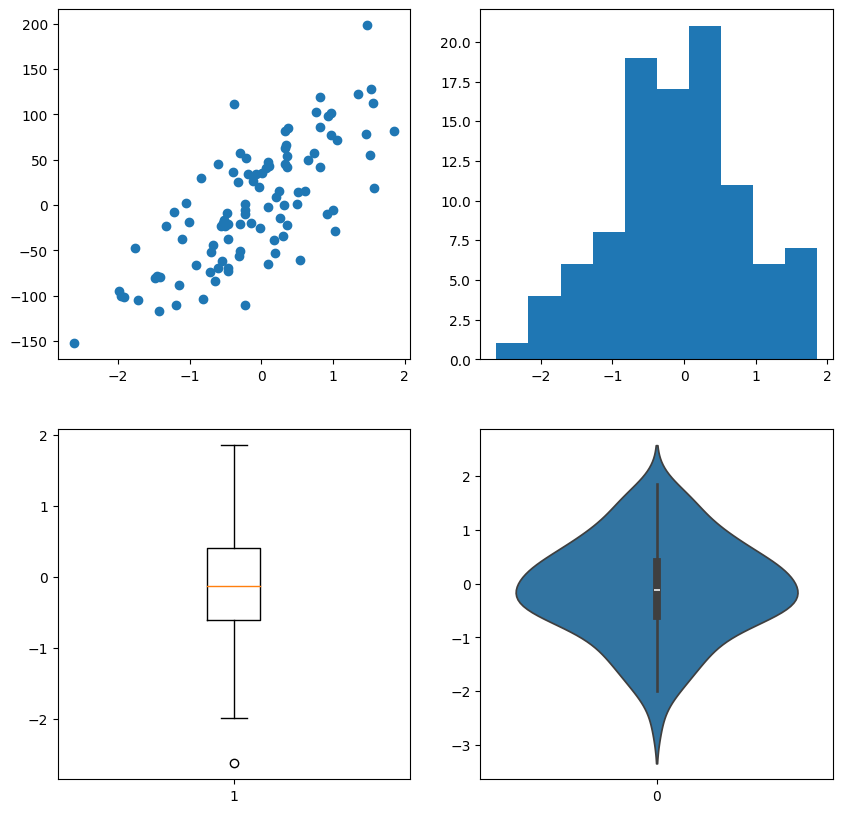

In [ ]:
# visualize outliers before and after
from random import random
from random import randint
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)
print('mean before outliers:', np.mean(X))
print('var before outliers:', np.var(X))
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(10, 10))
ax1.scatter(X, y)
ax2.hist(X)
ax3.boxplot(X)
sns.violinplot(ax=ax4, data=X);

mean after outliers: 0.18700497866917457
var after outliers: 3.2133240325351284


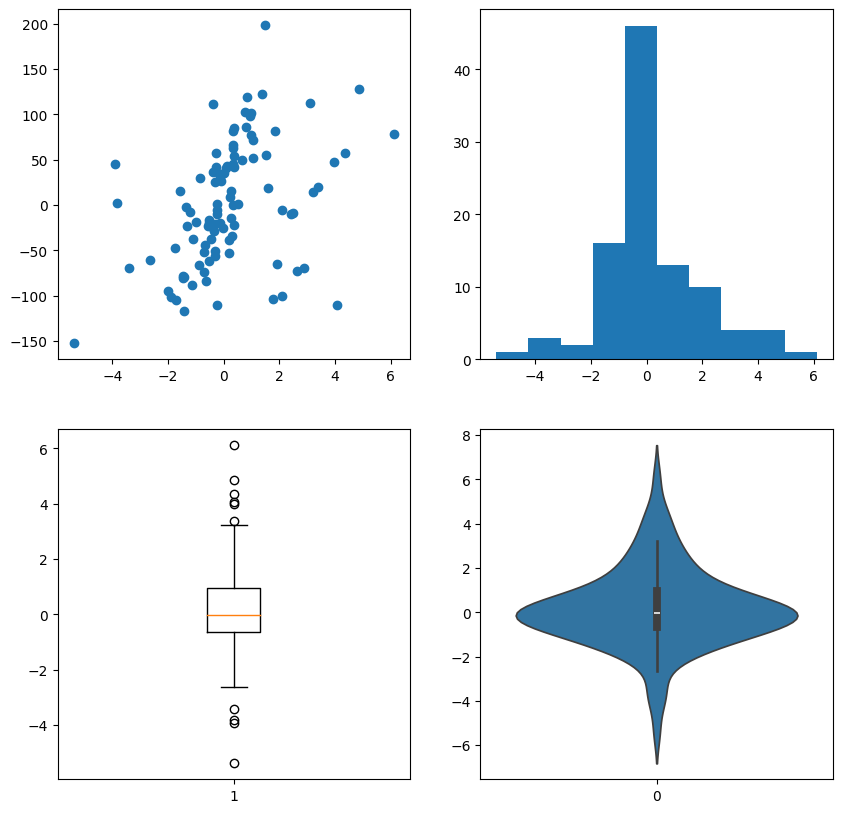

In [ ]:
# create outliers
for i in range(30):
    factor = randint(-3, 3)
    if random() > 0.5:
        X[i] += factor * X.std()
    else:
        X[i] -= factor * X.std()

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(10, 10))
ax1.scatter(X, y)
ax2.hist(X)
ax3.boxplot(X)
sns.violinplot(ax=ax4, data=X)
print('mean after outliers:', np.mean(X))
print('var after outliers:', np.var(X))

<Axes: >

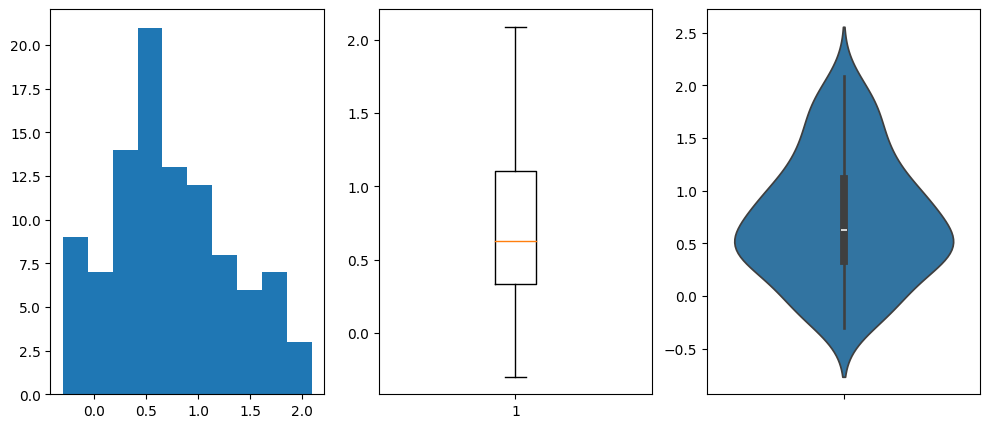

In [ ]:
# creating skewed data
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html
from scipy.stats import skewnorm

a = 4 # skewness parameter: positive values are right skewed, negative values are left skewed
X = skewnorm.rvs(a, size=100)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
ax1.hist(X)
ax2.boxplot(X)
sns.violinplot(ax=ax3, data=X)

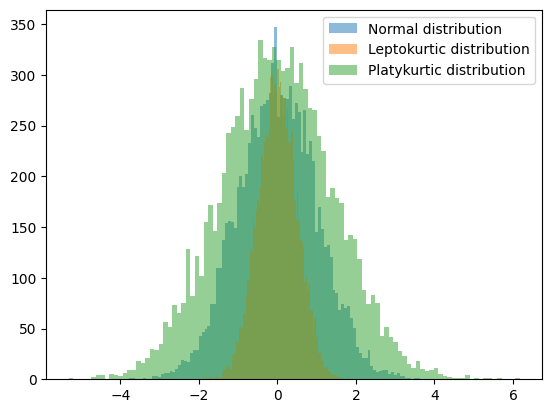

In [ ]:
import numpy as np
from scipy.stats import norm

# generate a normal distribution
normal_dist = norm(0, 1)
normal_samples = normal_dist.rvs(10000)

# generate a leptokurtic distribution
leptokurtic_dist = norm(loc=0, scale=0.5)
leptokurtic_samples = leptokurtic_dist.rvs(10000)

# generate a platykurtic distribution
platykurtic_samples = normal_samples + np.random.randn(10000)

# plot the distributions
import matplotlib.pyplot as plt
plt.hist(normal_samples, bins=100, alpha=0.5, label='Normal distribution')
plt.hist(leptokurtic_samples, bins=100, alpha=0.5, label='Leptokurtic distribution')
plt.hist(platykurtic_samples, bins=100, alpha=0.5, label='Platykurtic distribution')
plt.legend()
plt.show()

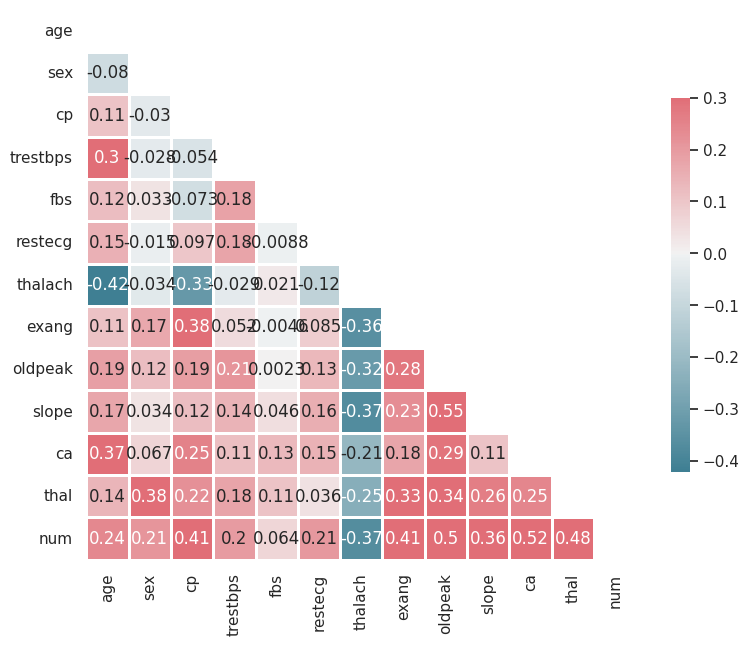

In [ ]:
# show correlation between the features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train._get_numeric_data().corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

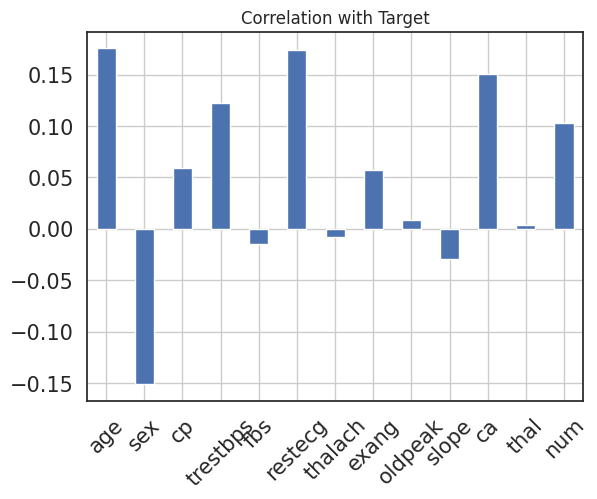

In [ ]:
# showing correlation of multiple features with one target
X_train.corrwith(y_train, numeric_only=True).plot.bar(
        title = "Correlation with Target", fontsize = 15,
        rot = 45, grid = True);